In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
# 設定 data_path
dir_data = './data/'
f_app_train = os.path.join(dir_data, 'application_train.csv')
f_app_test = os.path.join(dir_data, 'application_test.csv')

app_train = pd.read_csv(f_app_train)
app_test = pd.read_csv(f_app_test)

In [14]:


from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        print(col)
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1

print(app_train.shape)   
print(app_test.shape)
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)
print(app_train.shape)   
print(app_test.shape)

# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
# also apply to testing dataset
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

# absolute the value of DAYS_BIRTH
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_test['DAYS_BIRTH'] = abs(app_test['DAYS_BIRTH'])

NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
OCCUPATION_TYPE
WEEKDAY_APPR_PROCESS_START
ORGANIZATION_TYPE
FONDKAPREMONT_MODE
HOUSETYPE_MODE
WALLSMATERIAL_MODE
EMERGENCYSTATE_MODE
(307511, 122)
(48744, 121)
(307511, 243)
(48744, 239)


### 相關係數
一樣，pandas 很貼心地讓我們可以非常容易計算相關係數

In [15]:
app_train.corr()['TARGET']

SK_ID_CURR                                 -0.002108
TARGET                                      1.000000
NAME_CONTRACT_TYPE                         -0.030896
FLAG_OWN_CAR                               -0.021851
FLAG_OWN_REALTY                            -0.006148
CNT_CHILDREN                                0.019187
AMT_INCOME_TOTAL                           -0.003982
AMT_CREDIT                                 -0.030369
AMT_ANNUITY                                -0.012817
AMT_GOODS_PRICE                            -0.039645
REGION_POPULATION_RELATIVE                 -0.037227
DAYS_BIRTH                                 -0.078239
DAYS_EMPLOYED                               0.074958
DAYS_REGISTRATION                           0.041975
DAYS_ID_PUBLISH                             0.051457
OWN_CAR_AGE                                 0.037612
FLAG_MOBIL                                  0.000534
FLAG_EMP_PHONE                              0.045982
FLAG_WORK_PHONE                             0.

## 練習時間
列出目標 (TARGET) 與所有欄位之間相關係數，數值最大以及最小各 15 個

通過相關係數的結果觀察有興趣的欄位與 TARGET 或其他欄位的相關係數，並嘗試找出有趣的訊息
- 最好的方式當然是畫圖，舉例來說，我們知道  EXT_SOURCE_3 這個欄位和 TARGET 之間的相關係數是 -0.178919 (在已經這個資料集已經是最負的了！)，那我們可以 EXT_SOURCE_3  為 x 軸， TARGET 為 y 軸，把資料給畫出來

In [34]:
print('**********top 15*************')
print(app_train_corr.head(15))
print('**********tail 15*************')
print(app_train_corr.tail(15))

**********top 15*************
EXT_SOURCE_3                           -0.178919
EXT_SOURCE_2                           -0.160472
EXT_SOURCE_1                           -0.155317
DAYS_BIRTH                             -0.078239
NAME_EDUCATION_TYPE_Higher education   -0.056593
CODE_GENDER_F                          -0.054704
NAME_INCOME_TYPE_Pensioner             -0.046209
ORGANIZATION_TYPE_XNA                  -0.045987
DAYS_EMPLOYED_ANOM                     -0.045987
FLOORSMAX_AVG                          -0.044003
FLOORSMAX_MEDI                         -0.043768
FLOORSMAX_MODE                         -0.043226
EMERGENCYSTATE_MODE_No                 -0.042201
HOUSETYPE_MODE_block of flats          -0.040594
AMT_GOODS_PRICE                        -0.039645
Name: TARGET, dtype: float64
**********tail 15*************
DAYS_REGISTRATION                                    0.041975
OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                    

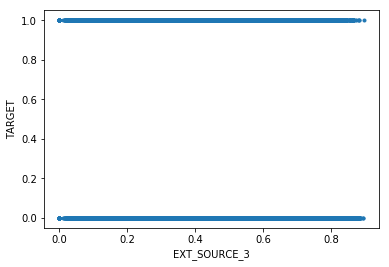

Correlation: nan


In [38]:
# 如果直接畫散布圖 - 看不出任何趨勢或形態
plt.plot(app_train['EXT_SOURCE_3'], app_train['TARGET'], '.')
plt.xlabel('EXT_SOURCE_3')
plt.ylabel('TARGET')
plt.show()
corr = np.corrcoef(app_train['EXT_SOURCE_3'], app_train['TARGET'])
print("Correlation: %.4f" % (corr[0][1]))

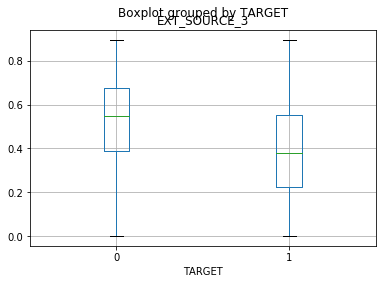

In [57]:
app_train.boxplot(column=['EXT_SOURCE_3'], by='TARGET')

## 有工作的比沒工作的TARGET比例較高

NAME_INCOME_TYPE_Businessman
0    282686
1     24825
Name: TARGET, dtype: int64
0    307501
1        10
Name: NAME_INCOME_TYPE_Businessman, dtype: int64


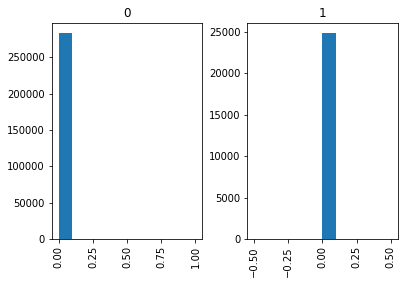

---------------
NAME_INCOME_TYPE_Commercial associate
0    282686
1     24825
Name: TARGET, dtype: int64
0    235894
1     71617
Name: NAME_INCOME_TYPE_Commercial associate, dtype: int64


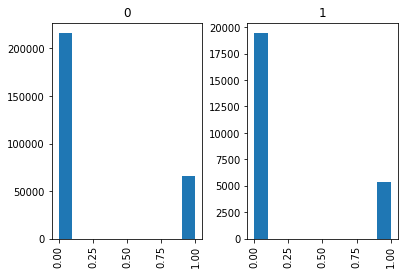

---------------
NAME_INCOME_TYPE_Maternity leave
0    282686
1     24825
Name: TARGET, dtype: int64
0    307506
1         5
Name: NAME_INCOME_TYPE_Maternity leave, dtype: int64


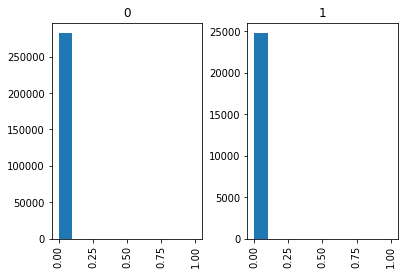

---------------
NAME_INCOME_TYPE_Pensioner
0    282686
1     24825
Name: TARGET, dtype: int64
0    252149
1     55362
Name: NAME_INCOME_TYPE_Pensioner, dtype: int64


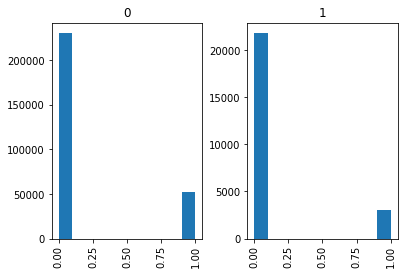

---------------
NAME_INCOME_TYPE_State servant
0    282686
1     24825
Name: TARGET, dtype: int64
0    285808
1     21703
Name: NAME_INCOME_TYPE_State servant, dtype: int64


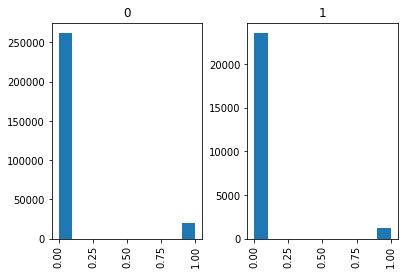

---------------
NAME_INCOME_TYPE_Student
0    282686
1     24825
Name: TARGET, dtype: int64
0    307493
1        18
Name: NAME_INCOME_TYPE_Student, dtype: int64


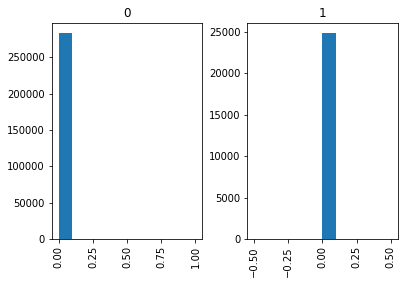

---------------
NAME_INCOME_TYPE_Unemployed
0    282686
1     24825
Name: TARGET, dtype: int64
0    307489
1        22
Name: NAME_INCOME_TYPE_Unemployed, dtype: int64


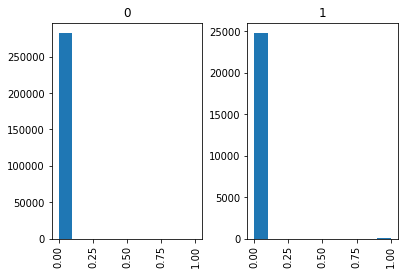

---------------
NAME_INCOME_TYPE_Working
0    282686
1     24825
Name: TARGET, dtype: int64
1    158774
0    148737
Name: NAME_INCOME_TYPE_Working, dtype: int64


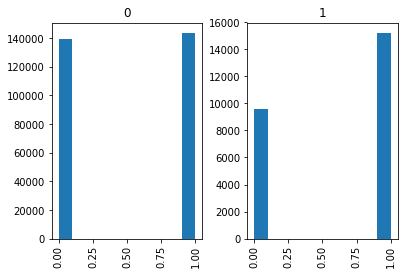

---------------


In [110]:
NAME_INCOME_TYPE_list = ['NAME_INCOME_TYPE_Businessman','NAME_INCOME_TYPE_Commercial associate','NAME_INCOME_TYPE_Maternity leave','NAME_INCOME_TYPE_Pensioner','NAME_INCOME_TYPE_State servant','NAME_INCOME_TYPE_Student','NAME_INCOME_TYPE_Unemployed','NAME_INCOME_TYPE_Working']
for col in NAME_INCOME_TYPE_list:
    print(col)
    print(app_train['TARGET'].value_counts())
    print(app_train[col].value_counts())
    app_train.hist(column=col, by = 'TARGET')
    plt.show()
    print("---------------")